**Cohort Analysis**

A **cohort** refers to a group of individuals or entities that share a common characteristic during a specific time frame. For instance, people born in India in the year 2000 form a cohort related to the country’s birth statistics. In a business setting, cohorts typically represent groups of customers or users who share a common trait or action — such as:

* Users who subscribed to an app during a particular month.
* Customers who cancelled their subscription within the same time period.

Cohort analysis allows businesses to study user behavior and trends at a group level, rather than analyzing each customer individually.

---

### **Why Cohort Analysis Matters**

Cohort analysis is a valuable tool for business growth because it provides targeted, actionable insights. By focusing on specific customer groups, companies can answer precise questions and make informed decisions. Some key benefits include:

* Understanding how user behavior influences customer acquisition and retention.
* Identifying and analyzing customer churn.
* Estimating customer lifetime value (CLV).
* Pinpointing areas where customer engagement can be improved.

---

### **Types of Cohort Analysis**

Cohorts can be classified into three main types:

1. **Time Cohorts:**
   These include customers who started using a product or service during a certain period (e.g., daily, monthly, or quarterly). Time-based analysis reveals how user behavior changes depending on when they joined.

2. **Behavior Cohorts:**
   These group customers based on their actions or purchasing behavior, such as the type of product they bought or the service plan they subscribed to. For example, users on a basic plan may behave differently from those on a premium plan. Understanding these differences helps businesses customize products or services for each segment.

3. **Size Cohorts:**
   These classify customers according to their purchase size or spending level within a given time frame. This might include analyzing customers based on how much they spend after acquisition or which product category represents most of their expenditure.

---

In essence, **cohort analysis** helps organizations gain deeper insights into customer behavior patterns, enabling them to make smarter, data-driven decisions for improving retention, engagement, and overall business performance.


In [20]:
# import library
import numpy as np 
import pandas as pd 
import datetime as dt

#For Data  Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For Machine Learning Algorithm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [21]:
df = pd.read_excel(r"D:\Online Retail\Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Looking at the information, there are missing values in Description and CustomerID  column. we will be dropping the null values.

In [23]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [24]:
## Dropping null values
df= df.dropna(subset=['CustomerID'])

In [25]:
## Checking for duplicates

df.duplicated().sum()

np.int64(5225)

In [26]:
## Dropping duplicates

df = df.drop_duplicates()


In [27]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,401604.000000,401604,401604.000000,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064,15281.160818
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000
75%,12.000000,2011-10-20 11:58:30,3.750000,16784.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,250.283037,NaN,69.764035,1714.006089


We can see that the minimum for the unit price = 0 and the minimum for the quantity is with a negative value. We will filter them out



In [28]:
df=df[(df['Quantity']>0) & (df['UnitPrice']>0)]

Now that the data has been cleaned, we can move on to performing cohort analysis in Python. To do this, we first need to create a few key labels:

1. Billing Period

This represents the year and month of each transaction or invoice. It indicates when a particular purchase occurred.

Example:
If the transaction date is 2023-07-15, the billing period will be "2023-07".

2. Cohort Group

The cohort group identifies the year and month of a customer’s first purchase. Every transaction made by that customer will have the same cohort group since it’s linked to the month they first became a customer.

Example:
If a customer made their first purchase in May 2023, their cohort group will be "2023-05" for all future transactions.

3. Cohort Period (or Cohort Index)

This label indicates how far along a customer is in their lifecycle — measured in months since their first purchase.

The first month (or period 1) corresponds to their initial purchase month.

Period 2 is one month later, and so on.

In [29]:

# Standardize invoice dates to the first day of the month
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [30]:
df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)


In [31]:
#  Get each customer's first purchase month (Cohort Month)

grouping = df.groupby('CustomerID')['InvoiceMonth']
df['CohortMonth'] = grouping.transform('min')

In [32]:
# function to extract year, month, and day from a datetime column
def get_month_int(dframe, column):
    year = dframe[column].dt.year
    month = dframe[column].dt.month
    day = dframe[column].dt.day
    return year, month, day

In [33]:
# Extract year and month for both invoice and cohort months
invoice_year, invoice_month, _ = get_month_int(df, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_month_int(df, 'CohortMonth')

In [34]:
# Calculate the time difference in months
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month

In [35]:

# Calculate time differences

year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month


In [37]:
# Create CohortIndex (Months since first purchase)
df['CohortIndex'] = year_diff * 12 + month_diff + 1

In [38]:
#Verify result
print(df[['CustomerID', 'InvoiceMonth', 'CohortMonth', 'CohortIndex']].head())

   CustomerID InvoiceMonth CohortMonth  CohortIndex
0     17850.0   2010-12-01  2010-12-01            1
1     17850.0   2010-12-01  2010-12-01            1
2     17850.0   2010-12-01  2010-12-01            1
3     17850.0   2010-12-01  2010-12-01            1
4     17850.0   2010-12-01  2010-12-01            1


In [39]:
#Count monthly active customers from each cohort
grouping = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
# Return number of unique elements in the object.
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='CustomerID')

In [40]:
# Retention table
cohort_size = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_size,axis=0) 
retention.round(3) * 100 

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,36.6,32.3,38.4,36.3,39.8,36.3,34.9,35.4,39.5,37.4,50.3,26.6
2011-01-01,100.0,22.1,26.6,23.0,32.1,28.8,24.7,24.2,30.0,32.6,36.5,11.8,NaN
2011-02-01,100.0,18.7,18.7,28.4,27.1,24.7,25.3,27.9,24.7,30.5,6.8,NaN,NaN
2011-03-01,100.0,15.0,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04-01,100.0,21.3,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.5,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.4,15.7,26.4,23.1,33.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.1,20.7,22.3,27.1,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


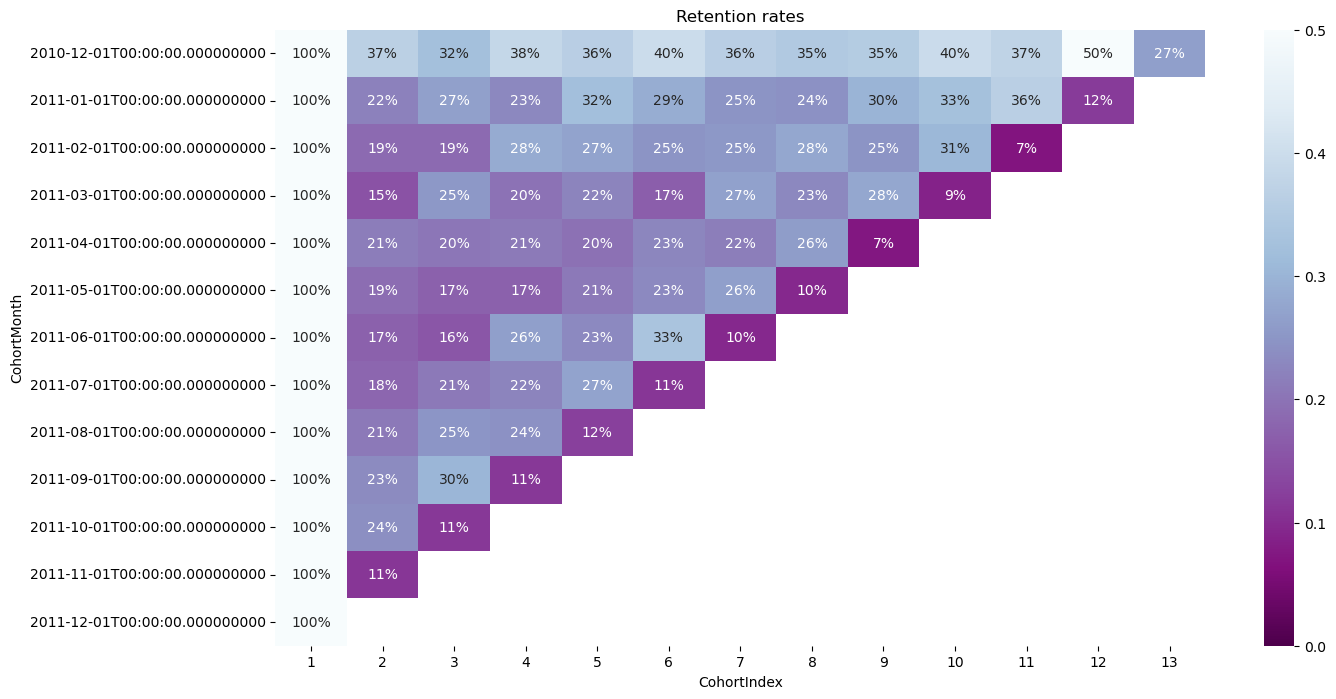

In [41]:
#Build the heatmap
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data=retention,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap="BuPu_r")
plt.show()

Customer retention is a very useful metric to understand how many of all customers are still active. Loyalty gives you the percentage of active customers compared to the total number of customers.

In [42]:
#Average quantity for each cohort
grouping = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['Quantity'].mean()
cohort_data = cohort_data.reset_index()
average_quantity = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='Quantity')
average_quantity.round(1)
average_quantity.index = average_quantity.index.date

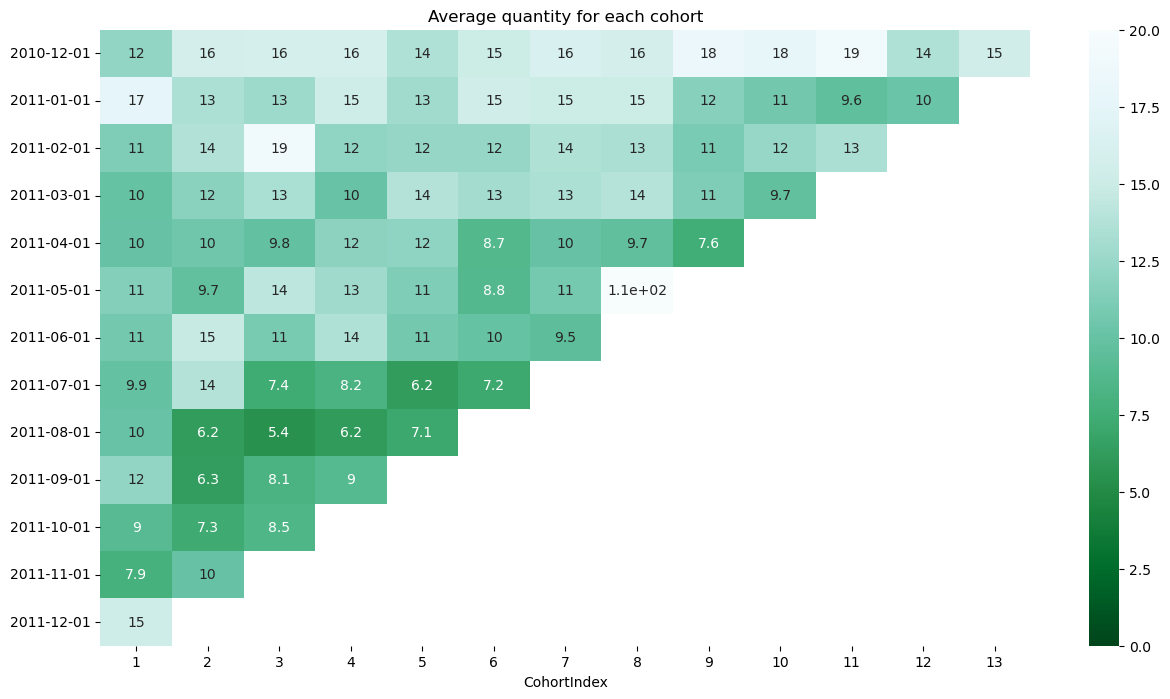

In [43]:
#Build the heatmap
plt.figure(figsize=(15, 8))
plt.title('Average quantity for each cohort')
sns.heatmap(data=average_quantity,annot = True,vmin = 0.0,vmax =20,cmap="BuGn_r")
plt.show()